According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

To use the model, we need the following information from a user (Be careful about uppercase and lowercase letters):
* gender ---> ['Male', 'Female', 'Other']
* age 	 ---> real number
* hypertension 	---> ['No', 'Yes']
* heart_disease ---> ['No', 'Yes']
* Residence_type ---> ['Urban', 'Rural']
* avg_glucose_level ---> real number
* bmi 	---> real number
* smoking_status 	---> ['formerly smoked', 'never smoked', 'smokes', 'Unknown']

# Importing Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load & Read Data

In [2]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
print("Stroke dataset has {} objects with {} features.".format(*data.shape))

Stroke dataset has 5110 objects with 12 features.


In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data['hypertension'].replace(to_replace=[0, 1], value=['No', 'Yes'], inplace=True)
data['heart_disease'].replace(to_replace=[0, 1], value=['No', 'Yes'], inplace=True)

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
for col in data.columns:
  if col not in ['id','age','bmi','avg_glucose_level','stroke']:
    print(col, data[col].unique())

gender ['Male' 'Female' 'Other']
hypertension ['No' 'Yes']
heart_disease ['Yes' 'No']
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [7]:
#checking missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

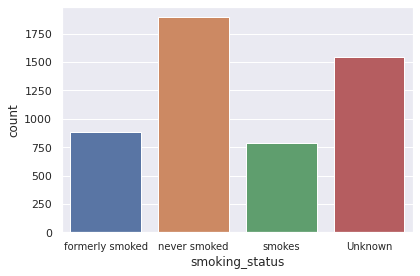

In [8]:
# Set the seaborn style to "darkgrid"
sns.set_theme(style="darkgrid")

# Create a countplot using seaborn and the 'smoking_status' column in the 'data' dataframe
ax = sns.countplot(data=data, x="smoking_status")

# Set the x-axis tick labels font size to 10
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

# Set the layout tight and show the plot
plt.tight_layout()
plt.show()

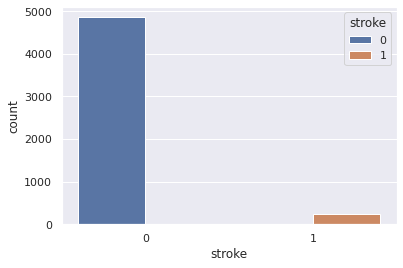

In [9]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(data=data, x="stroke",hue="stroke")

plt.show()

From the above figure, we conclude that the number of people who did not suffere from a stroke is more bigger than who did, this means that the dataset is imbalance. We likely have to use sampling techniques to make the data balanced

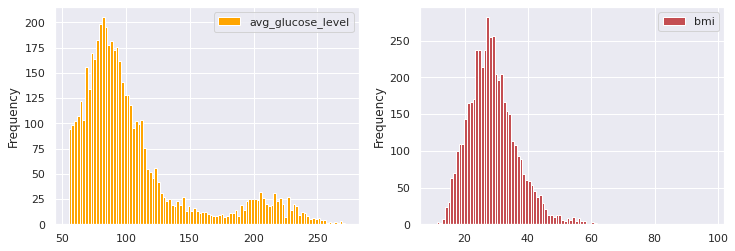

In [10]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot histogram for avg_glucose_level on the third subplot
data.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[0])

# Plot histogram for bmi on the second subplot
data.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[1])

# Display the plots
plt.show()

# Data Preprocessing

In [11]:
# Calculate the mean of the 'bmi' column in the 'data' dataframe
mean_bmi = data['bmi'].mean()

# Fill in missing values in the 'bmi' column with the mean value using the 'fillna' method
data['bmi'].fillna(value=mean_bmi, inplace=True)

In [12]:
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [13]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['hypertension'] = label_encoder.fit_transform(data['hypertension'])
data['heart_disease'] = label_encoder.fit_transform(data['heart_disease'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [14]:
minVec = data.min().copy()
maxVec = data.max().copy()
data = (data - minVec)/(maxVec-minVec)
data.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333,1.0
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.666667,1.0
2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667,1.0
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000,1.0
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667,1.0


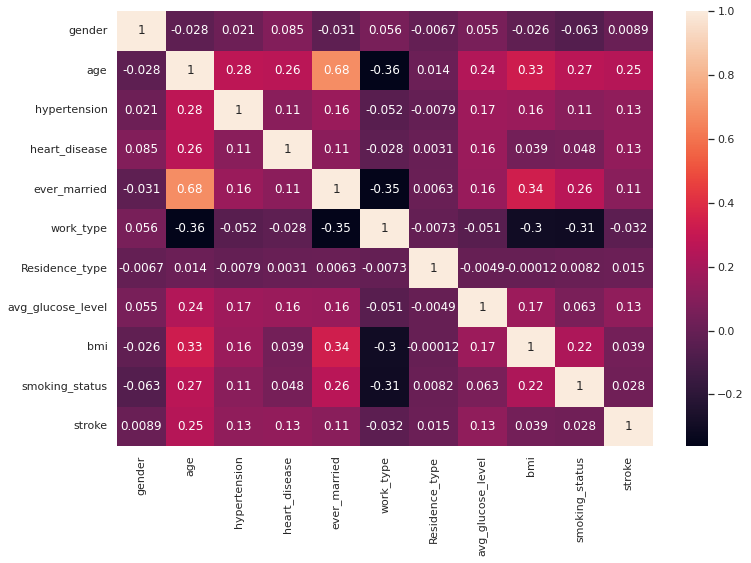

In [15]:
# Apply Corelation Matrix After preprocessing

plt.figure(figsize=(12,8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

In [16]:
# Define a function that takes a dataset and a threshold value as inputs and returns the set of all names of correlated columns
def correlation(dataset, threshold):
    # Initialize an empty set to store the names of correlated columns
    col_corr = set()
    
    # Calculate the correlation matrix for the dataset using the 'corr' method
    corr_matrix = dataset.corr()
    
    # Iterate over the columns of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the absolute value of the correlation coefficient is greater than the threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # If it is, add the name of the column to the set of correlated columns
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    # Return the set of correlated column names
    return col_corr


In [17]:
corr_features = correlation(data, 0.35)


In [18]:
corr_features

{'ever_married', 'work_type'}

In [19]:
X_corr = data.drop(corr_features,axis=1)
X_corr

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0.0,1.0,1.0,0.801265,0.301260,0.333333,1.0
1,0.0,0.743652,0.0,0.0,0.0,0.679023,0.212981,0.666667,1.0
2,0.5,0.975586,0.0,1.0,0.0,0.234512,0.254296,0.666667,1.0
3,0.0,0.597168,0.0,0.0,1.0,0.536008,0.276060,1.000000,1.0
4,0.0,0.963379,1.0,0.0,0.0,0.549349,0.156930,0.666667,1.0
...,...,...,...,...,...,...,...,...,...
5105,0.0,0.975586,1.0,0.0,1.0,0.132167,0.212981,0.666667,0.0
5106,0.0,0.987793,0.0,0.0,1.0,0.323516,0.340206,0.666667,0.0
5107,0.0,0.426270,0.0,0.0,0.0,0.128658,0.232532,0.666667,0.0
5108,0.5,0.621582,0.0,0.0,0.0,0.513203,0.175258,0.333333,0.0


# ML models

**Splitting Data**

In [20]:
# drop the 'Stroke' column from the DataFrame to create the feature matrix
X = data.drop('stroke', axis=1)
# create the target vector
y = data['stroke'] 
# split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_corr, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
# check shape
print('x_train: ', X_train.shape)
print('x_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (4088, 9)
x_test:  (1022, 9)
y_train:  (4088,)
y_test:  (1022,)


## Logistic Regression

In [22]:
# Apply Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

Text(0.5, 12.5, 'Predicted label')

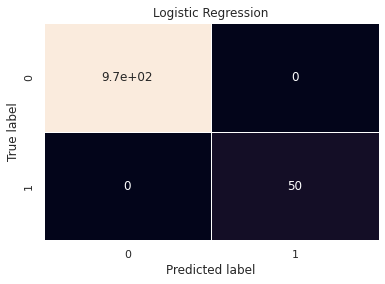

In [23]:
y_pred = LR.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Support vector machines

In [24]:
classifier_svm = SVC(C=1.5, kernel="linear")
classifier_svm = classifier_svm.fit(X_train, y_train)
y_pred_svm=classifier_svm.predict(X_test)

In [25]:
print(f"method: SVM; metric: accuracy_score; {accuracy_score(y_test, y_pred_svm)}")

method: SVM; metric: accuracy_score; 1.0


Text(0.5, 12.5, 'Predicted label')

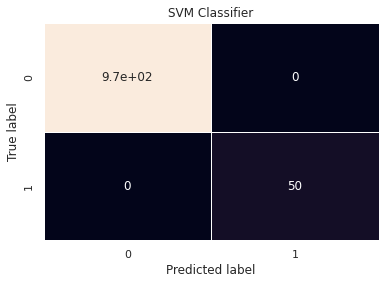

In [26]:
cfm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('SVM Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')